In [103]:
import autograd.numpy as np
import autograd.numpy.random as npr
npr.seed(0)

import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
#%matplotlib notebook

from IPython.display import HTML

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

from ssm.hmm import HMM, HSMM
from ssm.util import find_permutation

from hips.plotting.colormaps import gradient_cmap, white_to_color_cmap
color_names = [
    "windows blue",
    "red",
    "amber",
    "faded green",
    "dusty purple",
    "orange"
    ]

colors = sns.xkcd_palette(color_names)
cmap = gradient_cmap(colors)

# Generate synthetic data

In [140]:
npr.seed(0)

K = 3
D = 2
T = 100

# Make an HMM
true_hmm = HMM(K, D, observations="diagonal_ar")

# Manually tweak the means to make them farther apart
thetas = np.linspace(0, 2 * np.pi, K, endpoint=False)
true_hmm.observations.mu_init = 3 * np.column_stack((np.cos(thetas), np.sin(thetas)))

In [131]:
true_hmm.observations.mu_init.shape

(3, 2)

In [132]:
# Sample some data from the HMM
z, y = true_hmm.sample(T)
true_ll = true_hmm.log_probability(y)

In [133]:
true_ll

-292.49564174445027

In [134]:
true_hmm.params

((array([-1.09861229, -1.09861229, -1.09861229]),),
 (array([[-0.06524317, -3.37336568, -3.54438833],
         [-3.63317527, -0.05949977, -3.46311112],
         [-3.88485871, -3.17292312, -0.0644657 ]]),),
 (array([[[ 0.83575641,  0.45167601],
          [-0.45167601,  0.83575641]],
  
         [[ 0.93782174,  0.15162578],
          [-0.15162578,  0.93782174]],
  
         [[ 0.70634284,  0.6352793 ],
          [-0.6352793 ,  0.70634284]]]), array([[ 1.26611853, -0.50587654],
         [ 2.54520078,  1.08081191],
         [ 0.48431215,  0.57914048]]), array([], shape=(3, 2, 0), dtype=float64), array([[0., 0.],
         [0., 0.],
         [0., 0.]])))

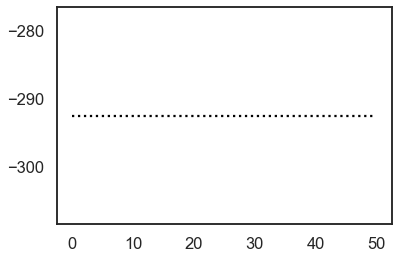

In [135]:
plt.plot([0, N_iters], true_ll * np.ones(2), ':k', label="True")

# fit HMM to this synthetic data

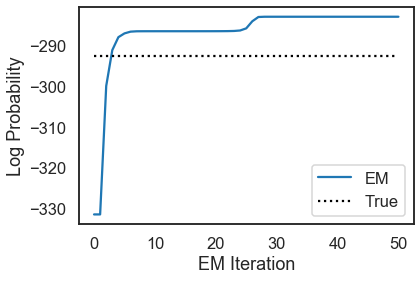

In [136]:
N_iters = 50
hmm = HMM(K, D, observations="diagonal_ar")
hmm_lls = hmm.fit(y, method="em", num_em_iters=N_iters)

plt.plot(hmm_lls, label="EM")
plt.plot([0, N_iters], true_ll * np.ones(2), ':k', label="True")
plt.xlabel("EM Iteration")
plt.ylabel("Log Probability")
plt.legend(loc="lower right")



In [137]:
# Find a permutation of the states that best matches the true and inferred states
hmm.permute(find_permutation(z, hmm.most_likely_states(y)))

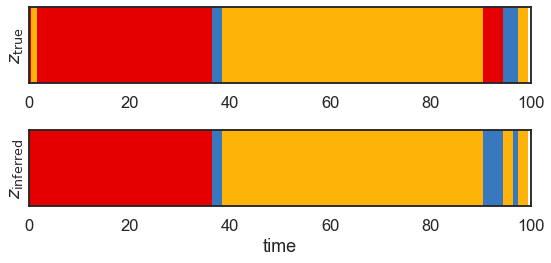

In [138]:
# Plot the true and inferred discrete states
hmm_z = hmm.most_likely_states(y)

plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.imshow(z[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1)
plt.xlim(0, T)
plt.ylabel("$z_{\\mathrm{true}}$")
plt.yticks([])

plt.subplot(212)
plt.imshow(hmm_z[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1)
plt.xlim(0, T)
plt.ylabel("$z_{\\mathrm{inferred}}$")
plt.yticks([])
plt.xlabel("time")

plt.tight_layout()

In [127]:
npr.seed(2)
npr.randn(2)

array([-0.41675785, -0.05626683])

In [141]:
np.exp(true_hmm.transitions.params)

array([[[0.93683963, 0.03427409, 0.02888629],
        [0.02643212, 0.94223575, 0.03133213],
        [0.02055073, 0.041881  , 0.93756827]]])

In [144]:
npr.seed(0)
Ps = .95 * np.eye(K) + .05 * npr.rand(K, K)
Ps /= Ps.sum(axis=1, keepdims=True)

In [146]:
true_hmm.transitions.transition_matrix

array([[0.93683963, 0.03427409, 0.02888629],
       [0.02643212, 0.94223575, 0.03133213],
       [0.02055073, 0.041881  , 0.93756827]])

In [150]:
tmp_z = [0]

In [152]:
for t in range(1,T):
    tmp_z.append(npr.choice(K, p=Ps[tmp_z[t-1]]))

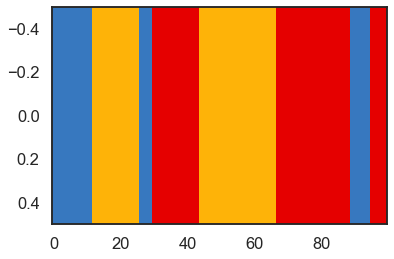

In [156]:
plt.imshow(np.array(tmp_z)[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1)

In [157]:
Ps

array([[0.93683963, 0.03427409, 0.02888629],
       [0.02643212, 0.94223575, 0.03133213],
       [0.02055073, 0.041881  , 0.93756827]])